In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt  
from copy import deepcopy
import time 
import pickle 


## Stored results from e-AutoMFIS

In [2]:
with open ('cis_challenge3.results','rb') as f:
    daily_results = pickle.load(f)

In [3]:
daily_results

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [11.50627073,  9.44817744,  5.42526929, ...,  9.7901334 ,
        20.87236497,  6.03259831],
       [11.48652824,  8.4248898 ,  3.94626453, ...,  9.7901334 ,
        18.19204709,  6.19115494],
       [12.29861554,  7.97414887,  4.03017548, ...,  9.7901334 ,
         5.75287884,  6.05805527]])

In [4]:
dataset = pd.read_csv('series/consumption.csv')
info_ = pd.read_csv('series/addInfo.csv')
weather_ = pd.read_csv('series/weather-avg.csv')

In [5]:
dataset

,meter_id,2017-01-01 00:00:00,2017-01-01 00:30:00,2017-01-01 01:00:00,2017-01-01 01:30:00,2017-01-01 02:00:00,2017-01-01 02:30:00,2017-01-01 03:00:00,2017-01-01 03:30:00,2017-01-01 04:00:00,...,2017-12-31 19:00:00,2017-12-31 19:30:00,2017-12-31 20:00:00,2017-12-31 20:30:00,2017-12-31 21:00:00,2017-12-31 21:30:00,2017-12-31 22:00:00,2017-12-31 22:30:00,2017-12-31 23:00:00,2017-12-31 23:30:00
0,0xa62b9f23553ff183f61e2bf943aab3d5983d02d7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.052,0.091,0.083,0.082,0.090,0.074,0.092,0.076,0.055,0.036
1,0x459c834d1f6cfb5b734b82aa9f5410fa97fb70da,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.402,0.639,0.537,0.834,0.868,0.394,0.073,0.077,0.049,0.048
2,0x4a1ed36825360a058cec2bdd409fc2459e1ce54f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.110,0.123,0.012,0.034,0.006,0.027,0.001,0.044,0.004,0.035
3,0x5b76d3c0e0aefc6e0a8d1d031f96388a23263407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.118,0.096,0.135,0.041,0.018,0.057,0.018,0.038,0.040,0.014
4,0x943ebe39ef2be6ef807c42c5a647e27112ca5b0f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.022,0.010,0.036,0.006,0.024,0.014,0.028,0.006,0.024,0.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3243,0x7dd7a7b8ee1bec7c44b24f738c752482f6161065,0.011,1.089,0.014,0.204,0.015,0.159,0.014,0.013,0.174,...,0.176,0.200,0.184,0.177,0.182,0.201,0.181,0.181,0.177,0.198
3244,0xfdaf9f857621ec06f2cf801f42a020a322835090,0.015,1.523,0.105,0.296,0.067,0.171,0.025,0.260,0.013,...,0.022,0.009,0.028,0.020,0.010,0.009,0.008,0.033,0.015,0.013
3245,0xd28f2f001e0cd4d6c121a3cb2e1427207e170e18,0.222,0.276,0.097,0.058,0.045,0.045,0.038,0.034,0.043,...,0.144,0.169,0.145,0.200,0.170,0.127,0.135,0.200,0.118,0.106
3246,0x47218b46abb2fcaade487a211911406dc6e13730,0.195,2.881,1.765,1.391,1.609,1.362,1.352,1.321,0.701,...,0.186,0.163,0.170,0.175,0.167,0.185,0.171,0.196,0.260,0.318


In [6]:
np.unique(info_['num_bedrooms'])

array([ 1.,  2.,  3.,  4.,  5., nan])

In [7]:
null_info = dataset.isna().sum(axis=1)

In [8]:
null_info

0       16416
1       16416
2       16416
3       16416
4       16416
        ...  
3243     1392
3244     2400
3245     1344
3246     1296
3247     1392
Length: 3248, dtype: int64

In [9]:
null_count = {}
for val in np.unique(null_info):
    idd = np.where(null_info == val)
    null_count[val] = len(idd[0])

In [10]:
null_count

{192: 1,
 1200: 2,
 1248: 15,
 1296: 60,
 1344: 83,
 1392: 62,
 1440: 23,
 1488: 7,
 1536: 1,
 1584: 1,
 1632: 2,
 1709: 1,
 1776: 2,
 1872: 2,
 1920: 2,
 1968: 1,
 2049: 1,
 2112: 1,
 2256: 1,
 2400: 1,
 2640: 3,
 2688: 22,
 2736: 63,
 2784: 77,
 2832: 48,
 2880: 27,
 2928: 3,
 2976: 5,
 3024: 1,
 3072: 3,
 3120: 2,
 3168: 2,
 3264: 1,
 3299: 1,
 3312: 1,
 3360: 2,
 3504: 1,
 3552: 1,
 3600: 2,
 3840: 1,
 3984: 5,
 4032: 21,
 4080: 56,
 4128: 74,
 4176: 64,
 4224: 21,
 4272: 10,
 4320: 2,
 4368: 1,
 4416: 1,
 4464: 1,
 4512: 1,
 4656: 1,
 4704: 2,
 4752: 1,
 4783: 1,
 4800: 1,
 4992: 2,
 5088: 1,
 5280: 1,
 5472: 5,
 5520: 33,
 5568: 76,
 5616: 82,
 5664: 38,
 5712: 8,
 5760: 4,
 5808: 4,
 5856: 1,
 5904: 2,
 5952: 2,
 6000: 2,
 6048: 1,
 6096: 2,
 6144: 1,
 6192: 1,
 6288: 2,
 6336: 1,
 6384: 1,
 6480: 1,
 6576: 1,
 6624: 1,
 6912: 5,
 6960: 25,
 7008: 86,
 7056: 80,
 7104: 36,
 7152: 13,
 7200: 8,
 7248: 3,
 7344: 2,
 7392: 3,
 7440: 1,
 7488: 1,
 7536: 2,
 7584: 1,
 7776: 2,
 8064:

In [11]:
range_list = [0]*(20000//500)
for k,v in null_count.items():
    i = k // 500
    range_list[i] += v

In [12]:
range_list

[1,
 0,
 252,
 12,
 4,
 248,
 13,
 10,
 251,
 9,
 7,
 250,
 12,
 32,
 233,
 5,
 264,
 8,
 5,
 259,
 8,
 5,
 264,
 6,
 2,
 264,
 7,
 263,
 5,
 5,
 270,
 1,
 265,
 6,
 2,
 0,
 0,
 0,
 0,
 0]

Text(0.5, 1.0, 'Missing values histogram')

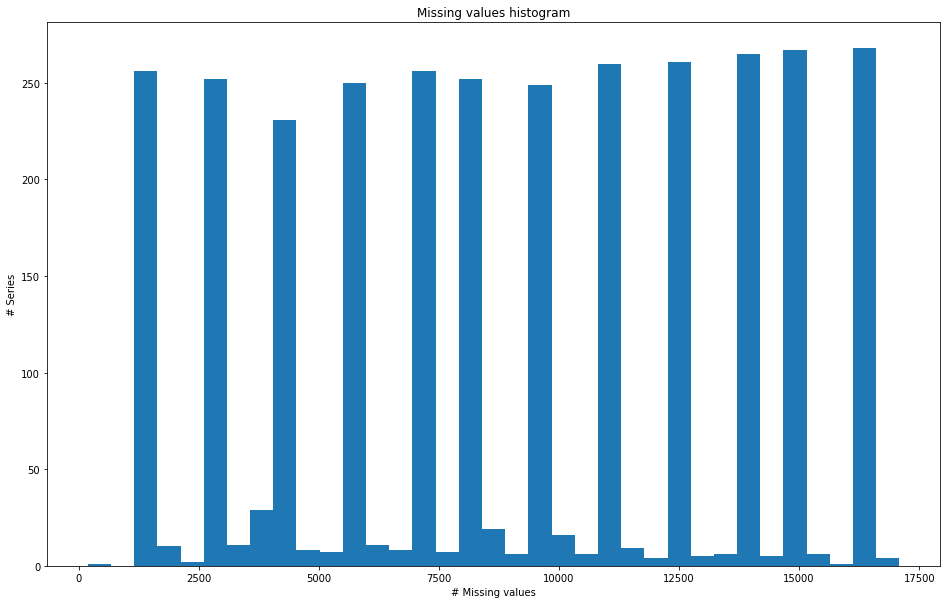

In [13]:
plt.figure(figsize=(16,10))
plt.hist(null_info,bins=35)
plt.ylabel('# Series')
plt.xlabel('# Missing values')
plt.title('Missing values histogram')

In [14]:
info_

,meter_id,dwelling_type,num_occupants,num_bedrooms,heating_fuel,hot_water_fuel,boiler_age,loft_insulation,wall_insulation,heating_temperature,...,refrigerator,tumble_dryer,washing_machine,game_console,laptop,pc,router,set_top_box,tablet,tv
0,0x02b7418b821b2edeeb2baa23ba1580566b4b0e43,semi_detached_house,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0xaf32b2b497e9eb9c3f3de907aedc6a7914a11f41,terraced_house,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0xdd45ab28a7a40eadc04607d6da42e5ad923b1339,semi_detached_house,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0x2b538a5ebfc3780aef25227267063cb6410d943b,detached_house,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0xee032ed498c9e99a4c65e0f39896fb30e513c6b7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2138,0xb9c600842cb2d195d461d675f2758ddbf5bb45bb,terraced_house,2.0,2.0,gas,gas,old,y,n,18_to_20,...,0.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0,0.0,1.0
2139,0x429e76a41f3141d9e62c4975e6b5df303cb45e64,bungalow,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2140,0x65fbd9ba598e703d742a32058ea2b323fe4c1fca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2141,0x101f2dc409b3b95d2bb08ebe5d282f54317e3f8c,bungalow,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
info_['dwelling_type'].unique()

array(['semi_detached_house', 'terraced_house', 'detached_house', nan,
       'bungalow', 'flat'], dtype=object)

In [16]:
info_['num_bedrooms'].fillna(0,inplace=True)

In [17]:
#explode = (0, 0, 0, 0.1, 0, 0,)
#plt.pie(num_bedrooms, explode=explode, labels=np.arange(0,6), autopct='%1.1f%%',shadow=True,radius=2)

In [18]:
dataset.fillna(method='pad',inplace=True)

In [19]:
dataset.isna().sum(axis=1)

0       16416
1       16416
2       16416
3       16416
4       16416
        ...  
3243        0
3244        0
3245        0
3246        0
3247        0
Length: 3248, dtype: int64

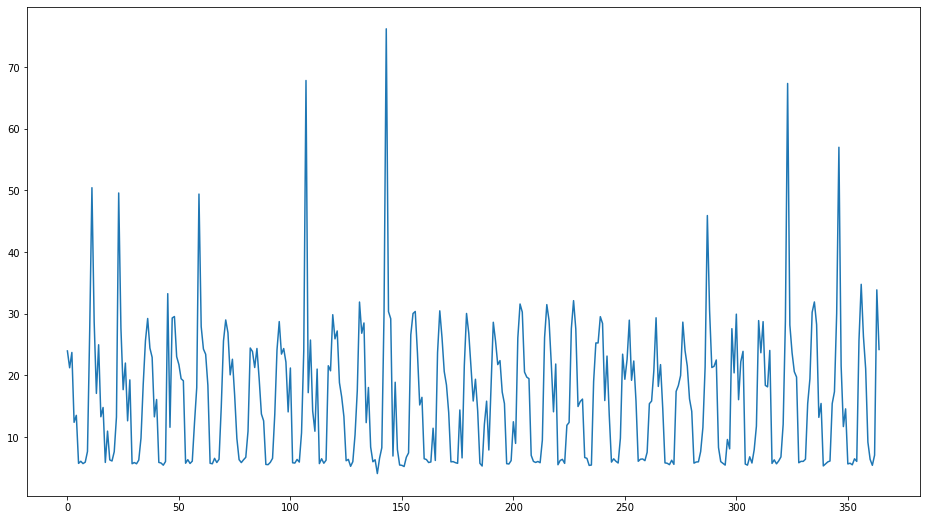

In [20]:
a = dataset.iloc[3246].values
aa = pd.Series(data = a[1:], index=pd.date_range(start='2017-01-01 00:00:00',freq='30min',periods=a.shape[0]-1))
b = aa.groupby(by=[aa.index.day, aa.index.month, aa.index.year]).sum()
plt.figure(figsize=(16,9))
plt.plot(b.values)

In [21]:
a.shape

(17521,)

In [22]:
b

1   1   2017    23.965
    2   2017    21.233
    3   2017    23.719
    4   2017    12.383
    5   2017    13.515
                 ...  
31  5   2017     6.378
    7   2017     5.408
    8   2017     7.055
    10  2017    33.873
    12  2017    24.201
Length: 365, dtype: object

In [23]:
'''
a = dataset.iloc[3238].values
aa = pd.Series(data = a[1:], index=pd.date_range(start='2017-01-01 00:00:00',freq='30min',periods=a.shape[0]-1))
b = aa.groupby(by=[aa.index.day, aa.index.month, aa.index.year]).sum()
plt.figure(figsize=(16,9))
plt.plot(b.values)
plt.xlabel('Timestamp (day)')
plt.ylabel('Consumption (kWh)')
'''

"\na = dataset.iloc[3238].values\naa = pd.Series(data = a[1:], index=pd.date_range(start='2017-01-01 00:00:00',freq='30min',periods=a.shape[0]-1))\nb = aa.groupby(by=[aa.index.day, aa.index.month, aa.index.year]).sum()\nplt.figure(figsize=(16,9))\nplt.plot(b.values)\nplt.xlabel('Timestamp (day)')\nplt.ylabel('Consumption (kWh)')\n"

In [24]:
#aa[:48].sum()

In [25]:
#b.values

In [26]:
#Treinar com 3246 e testar com 3238
c = dataset.iloc[3246].values
cc = pd.Series(data = c[1:], index=pd.date_range(start='2017-01-01 00:00:00',freq='30min',periods=a.shape[0]-1))
e = aa.groupby(by=[cc.index.day, cc.index.month, cc.index.year]).sum()
f = e.values

In [27]:
e

1   1   2017    23.965
    2   2017    21.233
    3   2017    23.719
    4   2017    12.383
    5   2017    13.515
                 ...  
31  5   2017     6.378
    7   2017     5.408
    8   2017     7.055
    10  2017    33.873
    12  2017    24.201
Length: 365, dtype: object

In [28]:
f

array([23.96500000000001, 21.233000000000004, 23.719000000000005,
       12.383000000000003, 13.515000000000004, 5.723999999999997,
       6.063999999999998, 5.687000000000001, 5.9250000000000025, 7.649,
       27.261999999999993, 50.44800000000001, 28.688999999999986, 17.075,
       24.966, 13.287999999999995, 14.790999999999999, 5.877,
       10.957500000000001, 6.281999999999999, 6.111000000000001,
       7.617000000000001, 13.251999999999997, 49.59100000000001,
       27.664000000000012, 17.680999999999994, 21.999000000000013,
       12.629999999999999, 19.270999999999997, 5.667000000000001,
       5.8610000000000015, 5.658999999999997, 6.254000000000001,
       9.812999999999999, 18.559, 25.614000000000004, 29.229,
       24.427000000000003, 22.927999999999997, 13.274000000000003, 16.087,
       5.881000000000002, 5.780999999999997, 5.4319999999999995,
       6.020000000000001, 33.25600000000001, 11.579000000000002,
       29.317000000000004, 29.54800000000001, 23.037999999999997,

In [29]:
d_values = dataset.T.values

In [30]:
v_values_2 = dataset.values
v_values_2.shape

(3248, 17521)

In [31]:
v_values = d_values.T

In [32]:
v_values.shape

(3248, 17521)

In [33]:
v_values = v_values[:,1:]

In [34]:
v_values.shape

(3248, 17520)

In [35]:
for k in range(v_values.shape[0]):
    aa = pd.Series(data = v_values[k,:], index=pd.date_range(start='2017-12-04 00:00:00',freq='30min',periods=v_values.shape[1]))
    b = aa.groupby(by=[aa.index.day, aa.index.month, aa.index.year]).sum()

    if k == 0:
        daily_values = np.ndarray((b.values.shape[0], v_values.shape[0]))

    daily_values[:,k] = b.values

In [36]:
daily_values.shape

(365, 3248)

In [37]:
daily_values

array([[ 0.    ,  0.    ,  0.    , ...,  5.956 , 28.243 , 14.353 ],
       [ 0.    ,  0.    ,  0.    , ...,  5.271 , 23.719 , 17.493 ],
       [ 0.    ,  0.    ,  0.    , ...,  5.582 , 13.188 ,  8.638 ],
       ...,
       [ 0.    ,  0.    ,  0.    , ..., 15.4265, 15.4265, 15.4265],
       [ 0.    ,  0.    ,  0.    , ...,  7.477 , 30.238 , 17.492 ],
       [ 0.    ,  0.    ,  0.    , ...,  7.966 , 28.176 , 15.041 ]])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
val = np.where(daily_values == 0, np.nan, daily_values)

In [ ]:
val = np.copy(daily_values)

In [ ]:
val[val == 0] = np.nan

In [ ]:
scal = StandardScaler()

In [ ]:
n_val = scal.fit_transform(val)

In [ ]:
n_val[0]

In [ ]:
np.where(n_val == np.nan)

In [ ]:
n_val[:,-1]

In [ ]:
num_nulls = dataset.isna().sum(axis=1)
not_null_index = np.where(num_nulls == 0)[0]

for k,i in enumerate(not_null_index):
    a = dataset.iloc[i].values
    aa = pd.Series(data = a[1:], index=pd.date_range(start='2017-01-01 00:00:00',freq='30min',periods=a.shape[0]-1))
    b = aa.groupby(by=[aa.index.day, aa.index.month, aa.index.year]).sum()

    if k == 0:
        daily_values2 = np.ndarray((b.values.shape[0], not_null_index.shape[0]))

    daily_values2[:,k] = b.values


daily_dataset = pd.DataFrame(daily_values2)

In [ ]:
num_nulls

In [ ]:
not_null_index.shape

In [ ]:
daily_dataset

In [ ]:
num_nulls = dataset.isna().sum(axis=1)
not_null_index = np.where(num_nulls == 0)[0]
pivot_numbers = daily_values[:,not_null_index]

In [ ]:
n_val.shape

In [ ]:
n_val[-247:,2800]

In [ ]:
n_val.shape

In [ ]:
mask = np.isnan(n_val[:,0])
idx = np.where(mask == False)
n_val[idx,]

In [ ]:
n_val.shape

In [ ]:
mmask = np.isnan(n_val[:,-247:])
idx = np.where(mmask == True)[0]

In [ ]:
idx

In [ ]:
pivot_val = np.copy(n_val[:,-247:])

In [ ]:
pd_pivot = pd.DataFrame(pivot_val)
pd_pivot.fillna(method='pad',inplace=True)
pd_pivot.fillna(method='ffill',inplace=True)
pd_pivot.fillna(method='bfill',inplace=True)

In [ ]:
pd_pivot

In [ ]:
pd_pivot.isnull().sum()

In [ ]:
pd_val = pd_pivot.values

In [ ]:
daily_values.shape[1] - pivot_numbers.shape[1]

In [ ]:
best_match = np.zeros((daily_values.shape[1] - pivot_numbers.shape[1],2))

for i in range(best_match.shape[0]):
    mask = np.isnan(n_val[:,i])
    idx = np.where(mask == False)

    t = n_val[idx,i].reshape(-1,1)

    blah = np.repeat(t, pivot_numbers.shape[1], axis=1)
    #print(blah.shape)
    #print(t.shape)
    c = np.mean(abs(blah - pd_val[idx,:]),axis=1).reshape(-1,1)
    #print(c)
    min_arg = np.argmin(c)
    # print(min_arg, c[min_arg], c[min_arg-1], c[min_arg+1])
    best_match[i,:] = np.array([min_arg,c[min_arg]])

In [ ]:
daily_results[:31,:] = daily_values2[:31,:]

In [ ]:
real_months = daily_results 
pred_months = daily_values2


In [ ]:
month_rAE = np.mean(np.sum(np.abs(real_months - pred_months), axis=1) / np.sum(np.abs(real_months - np.mean(real_months, axis=1, keepdims=True)), axis=1))


In [ ]:
month_rAE

In [ ]:
metrics = np.mean(abs(np.divide((daily_results - daily_values2),daily_values2+0.0001)),axis=0)

In [ ]:
metrics[np.where(metrics > 1.0)]

In [ ]:
daily_results[:,np.where(metrics > 1.0)] = daily_values2[:,np.where(metrics > 1.0)]

In [ ]:
metrics = np.mean(abs(np.divide((daily_results - daily_values2),daily_values2+0.0001)),axis=0)
metrics[np.where(metrics > 1.0)]

In [ ]:
all_daily_results = np.zeros((daily_results.shape[0],daily_values.shape[1]))

In [ ]:
daily_values.shape

In [ ]:
norm_daily_results = (np.copy(daily_results) - scal.mean_[-247:])/ scal.scale_[-247:]

In [ ]:
norm_daily_results

In [ ]:
for i in range(best_match.shape[0]):
    all_daily_results[:,i] = norm_daily_results[:,int(best_match[i,0])]

In [ ]:
all_daily_results[:,not_null_index] = norm_daily_results

In [ ]:
all_daily_results

In [ ]:
preds = scal.inverse_transform(all_daily_results)

In [ ]:
preds

In [ ]:
for i in range(best_match.shape[0]):
    f = 1/(1.0 - best_match[i,1])
    preds[:,i] = (preds[:,i] + scal.mean_[i]*f)/(f+1)

In [ ]:
preds

In [ ]:
month_results = np.zeros((12,preds.shape[1]))

for i in range(preds.shape[1]):
    ser = pd.Series(data=preds[:,i], index=pd.date_range(start='2017-01-01 00:00:00',freq='1D',periods=365))
    month_results[:,i] = ser.groupby(by=[ser.index.month, ser.index.year]).sum().values

In [ ]:
#submission2 = pd.read_csv('series/cis-competition/sample_submission2.csv')
submission2 = pd.read_csv('fuzzy_results3.csv')

In [ ]:
submission2['AnnualPRED']

In [ ]:
submission2['AnnualPRED'] = np.sum(month_results,axis=0)

In [ ]:
submission2['AnnualPRED']

In [ ]:
columns = ['JanPRED','FebPRED','MarPRED','AprPRED','MayPRED','JunPRED','JulPRED','AugPRED','SepPRED','OctPRED','NovPRED','DecPRED']

for i,name in enumerate(columns):
    submission2[name] = month_results[i,:]

In [ ]:
submission2

In [ ]:
#submission2.to_excel('sample_submission_fuzzy5.xlsx',index=False)

In [ ]:
# submission2.to_csv('fuzzy_results3.csv',index=False)

In [ ]:
# %pip install tslearn
from tslearn.clustering import TimeSeriesKMeans
model = TimeSeriesKMeans(n_clusters=6, metric="dtw", max_iter=10)
blah = model.fit_predict(daily_values[-30:,:].T)

inertias = []
distortion = []

for i in range(1,30):
    model = TimeSeriesKMeans(n_clusters=i, metric="dtw", max_iter=10)
    blah = model.fit_predict(daily_values[-30:,:].T)
    inertias.append(model.inertia_)


plt.plot(inertias,linewidth=2)
plt.xlabel('Clusters')
plt.ylabel('Distância')

In [ ]:
daily_results[:,20]

In [ ]:
plt.figure(figsize=(20,10))
for i,v in enumerate(blah):
    if v == 0:
        plt.subplot(321)
        plt.plot(daily_values[:,i])
    if v == 1:
        plt.subplot(322)
        plt.plot(daily_values[:,i])
    if v == 2:
        plt.subplot(323)
        plt.plot(daily_values[:,i])
    if v == 3:
        plt.subplot(324)
        plt.plot(daily_values[:,i])
    if v == 4:
        plt.subplot(325)
        plt.plot(daily_values[:,i])
    if v == 5:
        plt.subplot(326)
        plt.plot(daily_values[:,i])

In [38]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt  
from copy import deepcopy
from preprocessing import Preprocess

# e-AutoMFIS for the 247 series

In [39]:
#Basic informations 

num_predictors = 15
num_input = 15
lag = 30
lag_notused = np.array([[4,5],[4,5],[4],[4,5]])
not_used_lag = False

h_val = 30
#Actually, lag stands for all inputs for each serie. Example, lag = 2 uses s(t) and s(t-1) to predict s(t+1)
diff_series = False
detrend_series = False

C:\Users\Diego\AppData\Local\Temp\ipykernel_2336\2299202716.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  lag_notused = np.array([[4,5],[4,5],[4],[4,5]])


In [40]:
#training_data = d[:h_val]
#test_data = d[h_val:]

In [41]:
#bin_values = 12; #Representação da binarização do tempo.
num_series = 1  #Numero de series do problema, extraído dos dados

max_rulesize = 5 #Max numbers of premises rules.
min_activation = 0.7 #Minimum activation

form_method = 'nmean'
#####Definicao de funcoes######
#detrend_method = ''
#bin_method = ''

fuzzy_method = 'mfdef_cluster'
num_groups = 7

defuzz_method = 'height'

ensemble_rules = None

total_number = lag


filepath = 'cis-challenge'

In [42]:
import seaborn as sns
from copy import deepcopy
from utils import *

import itertools
import json
import os

#For e-autoMFIS, we import all of them.
from autoMFIS_test import autoMFIS
import numpy as np
import scipy.io
from reweight import Reweight
from fuzzyfication import Fuzzification
from defuzzification import Defuzzification
import matplotlib.pyplot as plt
from predict import predict, predict_pattern



def convert_object_to_float(data,datanames):
    
    for name in datanames:
        dname = data[name].values.astype('str')
        dname = [new_value.replace(',','.') for new_value in dname]
        data[name] = dname
        data[name] = data[name].astype(float)
    return data

##Assertion for ensemble rules
#Somehow, when appending rules, ensemble_rules[:,1] has a erroneous form. This part seems to normalize it.

#This module correct this error. Also, we are going to use some assertion to check if rules contains the same antecedents.
def correct_bug(ensemble_rules,max_rulesize=0):
    correct_rule = []
    d_stacked_rules = []
    new_ensemble_rules = np.zeros(shape=ensemble_rules.shape, dtype=object)


    for  n_times in range(ensemble_rules.shape[1]):
        t_rules = ensemble_rules[:,n_times]
        correct_rule = []
        d_stacked_rules = []
        k = 0
        for rule in t_rules:
            #print(rule)
            #print(len(rule))
            #Check if there's a rule bigger than max_rulesize + 1 (#antecedents + #consequent)
            if len(rule) > max_rulesize + 1:
                #print(rule)
                for i in rule:
                    #k += 1
                    if isinstance(i,tuple):
                        #print(i)
                        correct_rule.append(i)
                    else:
                        if len(correct_rule) == 0:
                            #print(i)
                            pass
                            #d_stacked_rules.append(i)
                        else:
                            #print(correct_rule)
                            new_ensemble_rules[k,n_times] = correct_rule
                            k += 1
                            #d_stacked_rules.append(correct_rule)
                            correct_rule = []
                            #d_stacked_rules.append(i)
            else:
                new_ensemble_rules[k,n_times] = rule
                k += 1
                #d_stacked_rules.append(rule)
            
        #new_ensemble_rules[:,i] = np.array(d_stacked_rules)

    return new_ensemble_rules

def remove_duplicates(new_ensemble_rules,ensemble_prem_terms, ensemble_antecedents):
    t_rules = deepcopy(new_ensemble_rules[:,0])
    no_duplicated_ensemble = np.zeros(new_ensemble_rules.shape,dtype=object)
    no_duplicated_prem_terms = np.zeros(ensemble_prem_terms.shape)
    no_duplicated_antecedents = np.zeros(ensemble_antecedents.shape,dtype=object)
    new_t_rules = None

    k = 0
    j = 0
    for rule in t_rules:
        if new_t_rules is None:
            new_t_rules = [rule]
            no_duplicated_ensemble[k,:] = deepcopy(new_ensemble_rules[j,:])
            no_duplicated_prem_terms[k,:] = deepcopy(ensemble_prem_terms[j,:])
            no_duplicated_antecedents[k,:] = deepcopy(ensemble_antecedents[j,:])
            k += 1

        elif not check_duplicate_rules(rule,new_t_rules):
            new_t_rules.append(rule)
            no_duplicated_ensemble[k,:] = deepcopy(new_ensemble_rules[j,:])
            no_duplicated_prem_terms[k,:] = deepcopy(ensemble_prem_terms[j,:])
            no_duplicated_antecedents[k,:] = deepcopy(ensemble_antecedents[j,:])
            k += 1
        j += 1

    new_rules = deepcopy(no_duplicated_ensemble[:k,:])
    new_prem_terms = deepcopy(no_duplicated_prem_terms[:k,:])
    new_antecedents = deepcopy(no_duplicated_antecedents[:k,:])

    return new_rules, new_prem_terms, new_antecedents



In [43]:
#daily_results.shape

In [44]:
#f_preprocess_data = Preprocess(f.reshape(-1,1),h_prev=h_val,num_series=num_series)
#f_yt, f_yp, f_yp_lagged = f_preprocess_data.delay_input(in_sample = f.reshape(-1,1), lag = lag)


#daily_results = np.zeros_like(daily_values)


In [45]:
daily_values.shape

(365, 3248)

In [ ]:
# missing_values = np.where(daily_results[50,:] == 0)[0]
for jj in range(12,daily_values.shape[1]):
# for jj in missing_values:
    data_ = daily_values[:,jj].reshape(-1,1)
    val_data_ = daily_values[:,jj].reshape(-1,1)
    # min_activation = 0.1

    preprocess_data = Preprocess(data_,h_prev=h_val,num_series=num_series)
    yt, yp, yp_lagged = preprocess_data.delay_input(in_sample = data_, lag = lag)

    val_yt, _, val_yp_lagged = preprocess_data.delay_input(in_sample = val_data_, lag = lag)

    training_set = data_
    ###############Fuzzificacao

    Fuzzyfy = Fuzzification(fuzzy_method)

    #Lembrete: 
    #axis 0 - Registros da série
    #axis 1 - Valor de pertinência ao conjunto Fuzzy
    #axis 2 - Numero de séries

    first_time = True
    for n in range(num_series):
        
        _, mf_params = Fuzzyfy.fuzzify(training_set[:,n],np.array([]),num_groups=num_groups)
        mX, _ = Fuzzyfy.fuzzify(yp[:,n],mf_params,num_groups=num_groups)
        mY, _ = Fuzzyfy.fuzzify(yt[:,n],mf_params,num_groups=num_groups)
        if first_time:
            mX_ = np.ndarray([mX.shape[0],mX.shape[1], num_series])
            mY_ = np.ndarray([mY.shape[0],mY.shape[1], num_series])
            mf_params_ = np.ndarray([mf_params.shape[0],num_series])
            first_time = False
        mX_[:,:,n] = mX
        mY_[:,:,n] = mY
        mf_params_[:,n] = mf_params.ravel()
        #print(mf_params)
        #print(mX.shape)


    mX_lagged_ = np.ndarray([mX_.shape[0],mX_.shape[1],yp_lagged.shape[1]])
    for i in range(num_series):
        mf_params = mf_params_[:,i]
        for j in range(lag):
            mX, _ = Fuzzyfy.fuzzify(yp_lagged[:,i*lag+j],mf_params,num_groups=num_groups)
            mX_lagged_[:,:,i*lag+j] = mX
            #print(i*lag+j)


    #mX_lagged_[:,:,not_select_subsample] = 0

    #print(mX_lagged_[:,:,not_select_subsample])
    ############## Formulacao
    if not_used_lag:
        new_mX, lags_used = remove_lags(mX_lagged_,lag_notused,num_series,lag)
    else:
        new_mX = mX_lagged_





    min_error = 300.0

    initial_values = val_yp_lagged[:,0].reshape(-1,1)
    in_sample = deepcopy(yt)
    out_sample = deepcopy(val_yt)


    #print('='*89)

    #print(f'Shape of in-sample is {in_sample.shape[0]}')
    #assert in_sample.shape[0] == h_train//7
    #print(f'Shape of lagged data is {yp_lagged.shape[0]}')
    #assert yp_lagged1.shape[0] == h_train//manual_pattern
    #print(f'Shape of validation set is {out_sample.shape[0]}')

    #print('='*89)



    try:
        #Concatenate rules
        init_time = time.time()
        for i in range(num_predictors):
            not_select_subsample = np.random.choice(total_number,total_number-num_input,replace=False)
            try:
                
                model = autoMFIS(diff_series=diff_series,detrend_series=detrend_series,fuzzy_method=fuzzy_method,solve_method='mqr',defuzz_method=defuzz_method, num_groups = num_groups, h_prev = in_sample.shape[0], num_series = num_series, max_rulesize = max_rulesize, min_activation = min_activation, lag = lag, hide_values = False, form_method = form_method,show=False)

                t_mX_lagged = deepcopy(mX_lagged_)
                t_mX_lagged[:,:,not_select_subsample] = 0

                model.set_fuzzification(Fuzzyfy, mf_params_, mX_, mY_, t_mX_lagged)        

                
                complete_rules, prem_terms, rules, agg_training, wd_ = model.train(training_set, yt=yt,yp=yp,yp_lagged=yp_lagged,in_sample=in_sample,out_sample=out_sample,not_select_subsample=not_select_subsample, lag_notused=[], debug=True)


                #print(f'Predict on validation set - #{i}')
                #Prediction of a single subset
                yt_totest, errors = model.predict(initial_values.reshape(1,-1), data=data_, in_sample = in_sample,out_sample=out_sample, agg_training=agg_training,h_prev=out_sample.shape[0],n_attempt=f'p_subsample_{i}',wd_=wd_,ensemble_antecedents=rules,ensemble_rules=complete_rules, filepath=filepath, lim=30.0, fig_axis=[1,1],ndata=dataset)


                #print('RMSE Errors = {}'.format(errors[0,:]))
                print('RRSE Errors = {}'.format(errors[1,:]))
                if errors[1,0] < min_error:
                    best_output = yt_totest
                    ensemble_rules = deepcopy(complete_rules)
                    ensemble_prem_terms = deepcopy(prem_terms)
                    ensemble_antecedents = deepcopy(rules)
                    wd__ = wd_
                    min_error = errors[1,0]

            except Exception as e:
                print(e)
                pass

            if (time.time() - init_time) > 60*10:
                print('Time exceeded. STOP')
                break

        daily_results[31:,jj] = best_output.flatten()

        #plt.figure(figsize=(8,5))


    except Exception as e:
        print(e)


Step 1 - Fuzzification
Step 2 - Formulation
Step 3 - Split
Step 4 - Reweight
Unable to allocate 112. GiB for an array with shape (14988855439,) and data type float64
Time exceeded. STOP
name 'best_output' is not defined


In [ ]:
plt.figure(figsize=(8,5))
plt.plot(best_output)
#plt.plot(out_sample)
plt.plot(daily_values[:,-1])
plt.legend(['Previsto','Real'])
plt.title('Previsão de energia (365 passos)')
plt.xlabel('Tempo (dia)')
plt.ylabel('Consumo')

In [ ]:
#daily_results[31:,11] = best_output.flatten()


In [ ]:
#import pickle 
with open('cis_challenge3.results','wb') as cis_challenge:
    pickle.dump(daily_results, cis_challenge)

In [ ]:
time.time() - a

In [ ]:
np.where(daily_results[50,:] == 0)

In [ ]:
for i in range(12,daily_values.shape[1]):
    print(i)

In [ ]:
semi_detached_house = info_['dwelling_type'] == 'semi_detached_house'

a = info_[semi_detached_house]

In [ ]:
a.hist(column='game_console')

In [ ]:
a.shape

In [ ]:
not_null_index.shape

In [ ]:
num_nulls = dataset.isna().sum(axis=1)
not_null_index = np.where(num_nulls == 0)[0]

for k,i in enumerate(not_null_index):
    a = dataset.iloc[i].values
    aa = pd.Series(data = a[1:], index=pd.date_range(start='2017-01-01 00:00:00',freq='30min',periods=a.shape[0]-1))
    b = aa.groupby(by=[aa.index.day, aa.index.month, aa.index.year]).sum()

    if k == 0:
        daily_values = np.ndarray((b.values.shape[0], not_null_index.shape[0]))

    daily_values[:,k] = b.values


daily_dataset = pd.DataFrame(daily_values)

In [ ]:
plt.plot(daily_values[:,245])
plt.plot(daily_values[:,237])
plt.plot(daily_values[:,230])
plt.plot(daily_values[:,31])

In [ ]:
daily_values.sum(axis=0)

In [ ]:
k = 8
for i in range(10*k,10*k+4):
    plt.plot(daily_values[:,i])

In [ ]:
weather_data = weather_.values

In [ ]:
weather_

In [ ]:
plt.plot(weather_data[500,1:])
plt.plot(daily_values[:,3])

In [ ]:
dataset['meter_id']

In [ ]:
submission = pd.read_csv('series/cis-competition/sample_submission.csv')


In [ ]:
submission